# Early Screening Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact
import ipywidgets as widgets
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from scipy.stats import mode
from sklearn.model_selection import GridSearchCV
import joblib


In [2]:
ES_data = pd.read_csv('../../datasets/Early Risk Screening Data/early_screening_data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

ES_data.head()

,age,gender,ethnicity,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,existing_conditions,label
0,43,Male,Ethnicity_A,Other,1,0,0,0,Low_Salt,Chronic Gastritis,0
1,86,Female,Ethnicity_B,California,1,0,0,1,High_Salt,Diabetes,0
2,68,Male,Ethnicity_A,California,0,1,1,0,High_Salt,NaN,0
3,57,Female,Ethnicity_A,Other,0,0,0,1,High_Salt,Chronic Gastritis,0
4,33,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Diabetes,0


In [3]:
ES_data.shape

(212354, 11)

In [4]:
ES_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212354 entries, 0 to 212353
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   age                            212354 non-null  int64 
 1   gender                         212354 non-null  object
 2   ethnicity                      212354 non-null  object
 3   geographical_location          212354 non-null  object
 4   family_history                 212354 non-null  int64 
 5   smoking_habits                 212354 non-null  int64 
 6   alcohol_consumption            212354 non-null  int64 
 7   helicobacter_pylori_infection  212354 non-null  int64 
 8   dietary_habits                 212354 non-null  object
 9   existing_conditions            169868 non-null  object
 10  label                          212354 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 17.8+ MB


In [5]:
for col in ES_data.columns:
    if col != 'age':
        print("===========================")
        print(ES_data[col].value_counts())

gender
Male      148706
Female     63648
Name: count, dtype: int64
ethnicity
Ethnicity_A    127571
Ethnicity_B     63569
Ethnicity_C     21214
Name: count, dtype: int64
geographical_location
California    169603
Other          42751
Name: count, dtype: int64
family_history
0    148528
1     63826
Name: count, dtype: int64
smoking_habits
0    127592
1     84762
Name: count, dtype: int64
alcohol_consumption
0    106309
1    106045
Name: count, dtype: int64
helicobacter_pylori_infection
0    159378
1     52976
Name: count, dtype: int64
dietary_habits
High_Salt    169805
Low_Salt      42549
Name: count, dtype: int64
existing_conditions
Chronic Gastritis    106309
Diabetes              63559
Name: count, dtype: int64
label
0    191395
1     20959
Name: count, dtype: int64


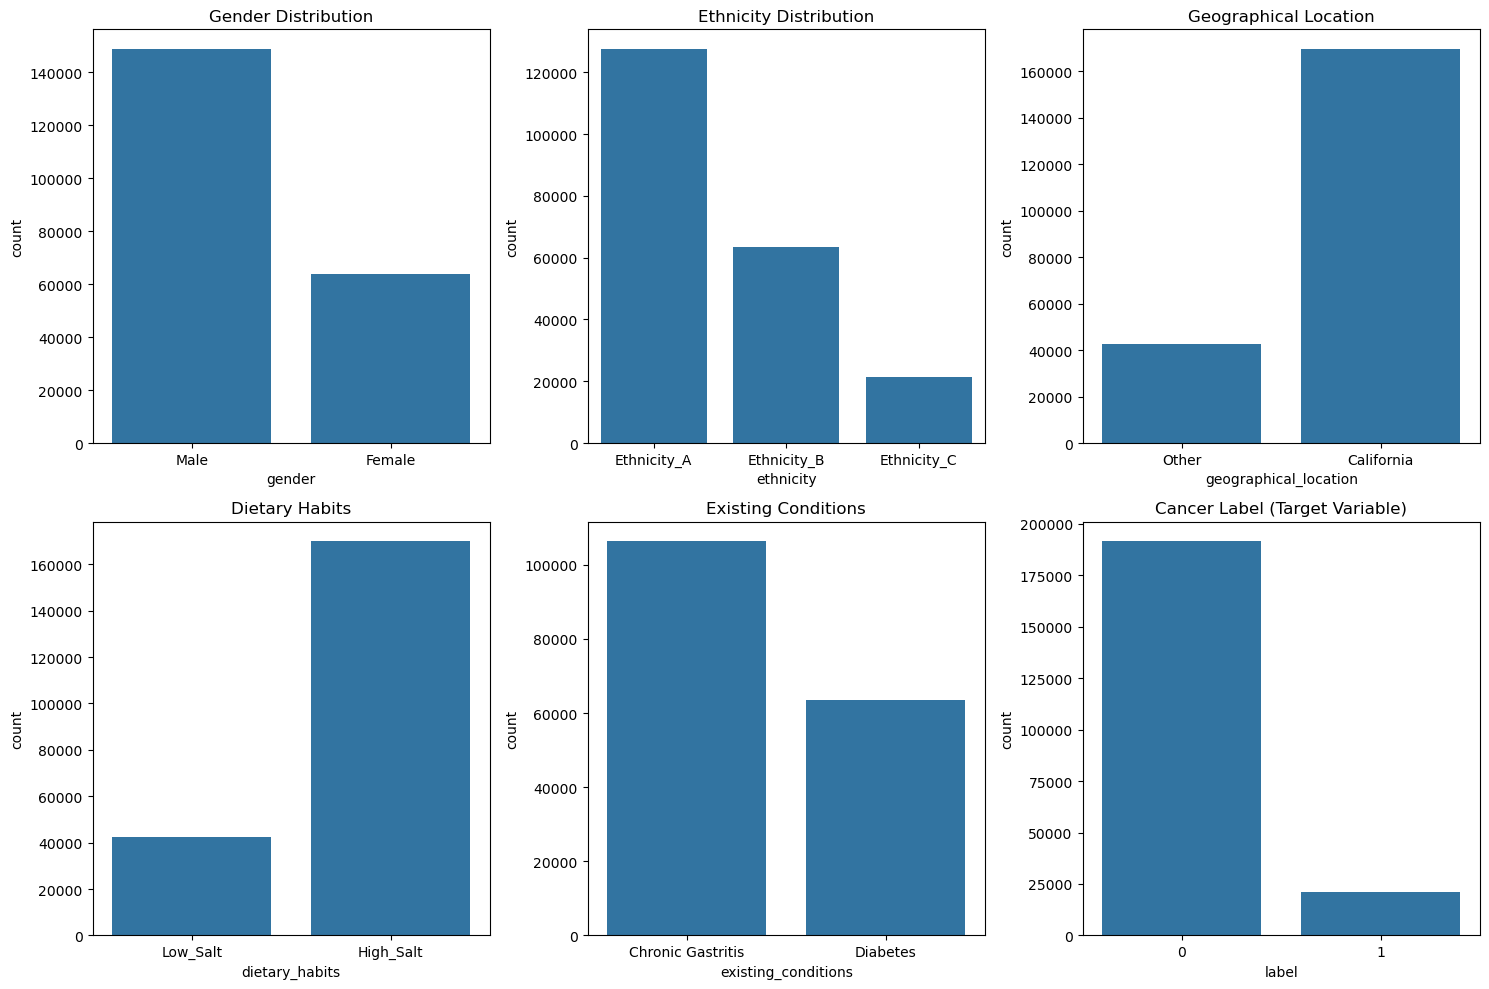

In [6]:
plt.figure(figsize=(15, 10))

# First plot: Gender
plt.subplot(2, 3, 1)
sns.countplot(x='gender', data=ES_data)
plt.title("Gender Distribution")

# Second plot: Ethnicity
plt.subplot(2, 3, 2)
sns.countplot(x='ethnicity', data=ES_data)
plt.title("Ethnicity Distribution")

# Third plot: Geographical Location
plt.subplot(2, 3, 3)
sns.countplot(x='geographical_location', data=ES_data)
plt.title("Geographical Location")

# Fourth plot: Dietary Habits
plt.subplot(2, 3, 4)
sns.countplot(x='dietary_habits', data=ES_data)
plt.title("Dietary Habits")

# Fifth plot: Existing Conditions (excluding NaN)
plt.subplot(2, 3, 5)
sns.countplot(x='existing_conditions', data=ES_data[ES_data['existing_conditions'].notna()])
plt.title("Existing Conditions")

# Sixth plot: Label
plt.subplot(2, 3, 6)
sns.countplot(x='label', data=ES_data)
plt.title("Cancer Label (Target Variable)")

plt.tight_layout()
plt.show()

## Missing Values Analysis: `existing_condition` Column

### Key Findings

### Interpretation

#### Missing Values Likely Indicate "No Condition"
🔍 **Rationale:**
1. No systematic pattern found in missingness
2. Clinical context suggests blank = no reported conditions
3. Common in self-reported health data

## Recommended Actions

```python
# Best practice handling:
df['existing_condition'] = 
    df['existing_condition']
    .fillna('No_condition')  # Explicit category


In [7]:
ES_data['existing_conditions'] = ES_data['existing_conditions'].fillna("No_condition")
ES_data.head()

,age,gender,ethnicity,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,existing_conditions,label
0,43,Male,Ethnicity_A,Other,1,0,0,0,Low_Salt,Chronic Gastritis,0
1,86,Female,Ethnicity_B,California,1,0,0,1,High_Salt,Diabetes,0
2,68,Male,Ethnicity_A,California,0,1,1,0,High_Salt,No_condition,0
3,57,Female,Ethnicity_A,Other,0,0,0,1,High_Salt,Chronic Gastritis,0
4,33,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Diabetes,0


In [8]:
ES_data.describe()

,age,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,label
count,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000
mean,53.2580,0.3006,0.3992,0.4994,0.2495,0.0987
std,18.9844,0.4585,0.4897,0.5000,0.4327,0.2983
min,20.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,37.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,50.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,69.0000,1.0000,1.0000,1.0000,0.0000,0.0000
max,89.0000,1.0000,1.0000,1.0000,1.0000,1.0000


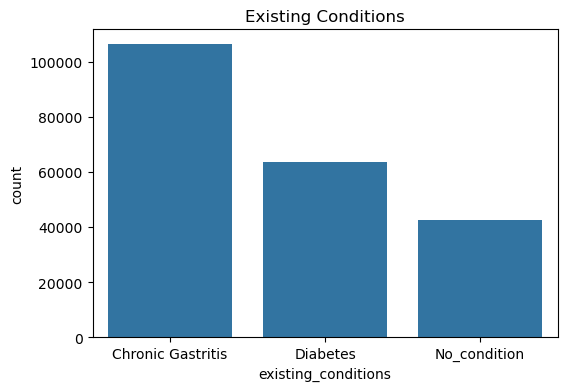

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=ES_data, x=ES_data['existing_conditions'])
plt.title("Existing Conditions")
plt.show()

In [10]:
ES_data_num_cols = ['age']
ES_data_multi_cat_cols = ['ethnicity', 'existing_conditions']
ES_data_bin_cat_cols = ['gender','geographical_location', 'dietary_habits']

In [11]:
le = LabelEncoder()

for column in ES_data_bin_cat_cols:
    le.fit(ES_data[column])  # Fit the encoder on the column
    print(f"Classes for column '{column}':")
    
    # Print each class and its corresponding encoded value
    class_mapping = dict(zip(le.classes_, range(len(le.classes_))))
    print(class_mapping)
    print()

Classes for column 'gender':
{'Female': 0, 'Male': 1}

Classes for column 'geographical_location':
{'California': 0, 'Other': 1}

Classes for column 'dietary_habits':
{'High_Salt': 0, 'Low_Salt': 1}



In [12]:
le = LabelEncoder()

for col in ES_data_bin_cat_cols:
    ES_data[col] = le.fit_transform(ES_data[col])

ES_data.head()

,age,gender,ethnicity,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,existing_conditions,label
0,43,1,Ethnicity_A,1,1,0,0,0,1,Chronic Gastritis,0
1,86,0,Ethnicity_B,0,1,0,0,1,0,Diabetes,0
2,68,1,Ethnicity_A,0,0,1,1,0,0,No_condition,0
3,57,0,Ethnicity_A,1,0,0,0,1,0,Chronic Gastritis,0
4,33,1,Ethnicity_A,0,0,1,1,0,0,Diabetes,0


In [13]:
# joblib.dump(le, "../../models/Early screening/ES_label_Encoder.pkl")

In [14]:
# Create the encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_array = ohe.fit_transform(ES_data[ES_data_multi_cat_cols])

# Convert to DataFrame with proper column names
encoded_df = pd.DataFrame(
    encoded_array,
    columns=ohe.get_feature_names_out(ES_data_multi_cat_cols),
    index=ES_data.index  # preserve original index
)

# Drop original multi-cat columns and concatenate the encoded ones
ES_data = ES_data.drop(columns=ES_data_multi_cat_cols)
ES_data = pd.concat([ES_data, encoded_df], axis=1)

# Now ES_data is ready!
ES_data.head()

,age,gender,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,label,ethnicity_Ethnicity_A,ethnicity_Ethnicity_B,ethnicity_Ethnicity_C,existing_conditions_Chronic Gastritis,existing_conditions_Diabetes,existing_conditions_No_condition
0,43,1,1,1,0,0,0,1,0,1.0,0.0,0.0,1.0,0.0,0.0
1,86,0,0,1,0,0,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0
2,68,1,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
3,57,0,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0
4,33,1,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# joblib.dump(ohe, "../../models/Early screening/ES_ohe_Encoder.pkl")

In [16]:
ES_data.describe()

,age,gender,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,label,ethnicity_Ethnicity_A,ethnicity_Ethnicity_B,ethnicity_Ethnicity_C,existing_conditions_Chronic Gastritis,existing_conditions_Diabetes,existing_conditions_No_condition
count,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000,212354.0000
mean,53.2580,0.7003,0.2013,0.3006,0.3992,0.4994,0.2495,0.2004,0.0987,0.6007,0.2994,0.0999,0.5006,0.2993,0.2001
std,18.9844,0.4581,0.4010,0.4585,0.4897,0.5000,0.4327,0.4003,0.2983,0.4897,0.4580,0.2999,0.5000,0.4580,0.4001
min,20.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,37.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,50.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
75%,69.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000
max,89.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


> `Gender` --------> (1 Male/0 Female)

> `geographical_location` --------> (1 other/0 calefornia)

> `family_history` --------> (1 yes/0 no)

> `smoking_habits` --------> (1 Yss/0 no)

> `alcohol_consumption` --------> (1 Yes/0 no)

> `helicobacter_pylori_infection` --------> (1 other/0 calefornia)

> `family_history` --------> (1 yes/0 no)

> `smoking_habits` --------> (1 Yss/0 no)

In [17]:
# ES_data.drop(columns = ['age'], inplace = True)

In [18]:
ES_data['label'].value_counts()

label
0    191395
1     20959
Name: count, dtype: int64

## Splitting the data
We will split the data to 15% validation set, 15% testing set, 70% training set before balancing

In [19]:
Y = ES_data['label']
X = ES_data.drop('label',axis = 1)

# Splitting the data to 30% test and 70% train for now
x_train, x_temp, y_train, y_temp = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)


# Split that 30% into 15% validation and 15% test (i.e., 50% of 30%)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [20]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

(148647, 14)
(31853, 14)
(31854, 14)
label
0    133976
1     14671
Name: count, dtype: int64
label
0    28709
1     3144
Name: count, dtype: int64
label
0    28710
1     3144
Name: count, dtype: int64


In [21]:
# x_train.to_csv('../../datasets/Early Risk Screening Data/Training set/x_train.csv', index = False)
# y_train.to_csv('../../datasets/Early Risk Screening Data/Training set/y_train.csv', index = False)


# x_val.to_csv('../../datasets/Early Risk Screening Data/Validation set/x_val.csv', index = False)
# y_val.to_csv('../../datasets/Early Risk Screening Data/Validation set/y_val.csv', index = False)


# x_test.to_csv('../../datasets/Early Risk Screening Data/Test set/x_test.csv', index = False)
# y_test.to_csv('../../datasets/Early Risk Screening Data/Test set/y_test.csv', index = False)

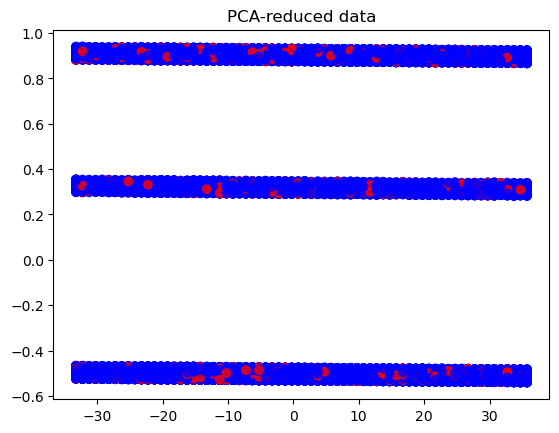

In [22]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='bwr', alpha = 0.8)
plt.title("PCA-reduced data")
plt.show()

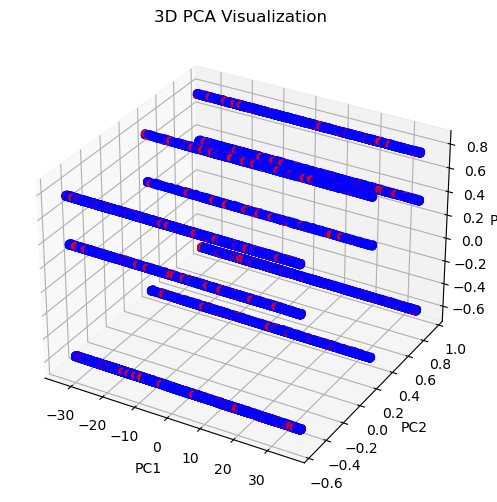

In [23]:
pca = PCA(n_components=3)
X_3d = pca.fit_transform(x_train)

# 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_train, cmap='bwr', alpha=0.7)
ax.set_title("3D PCA Visualization")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

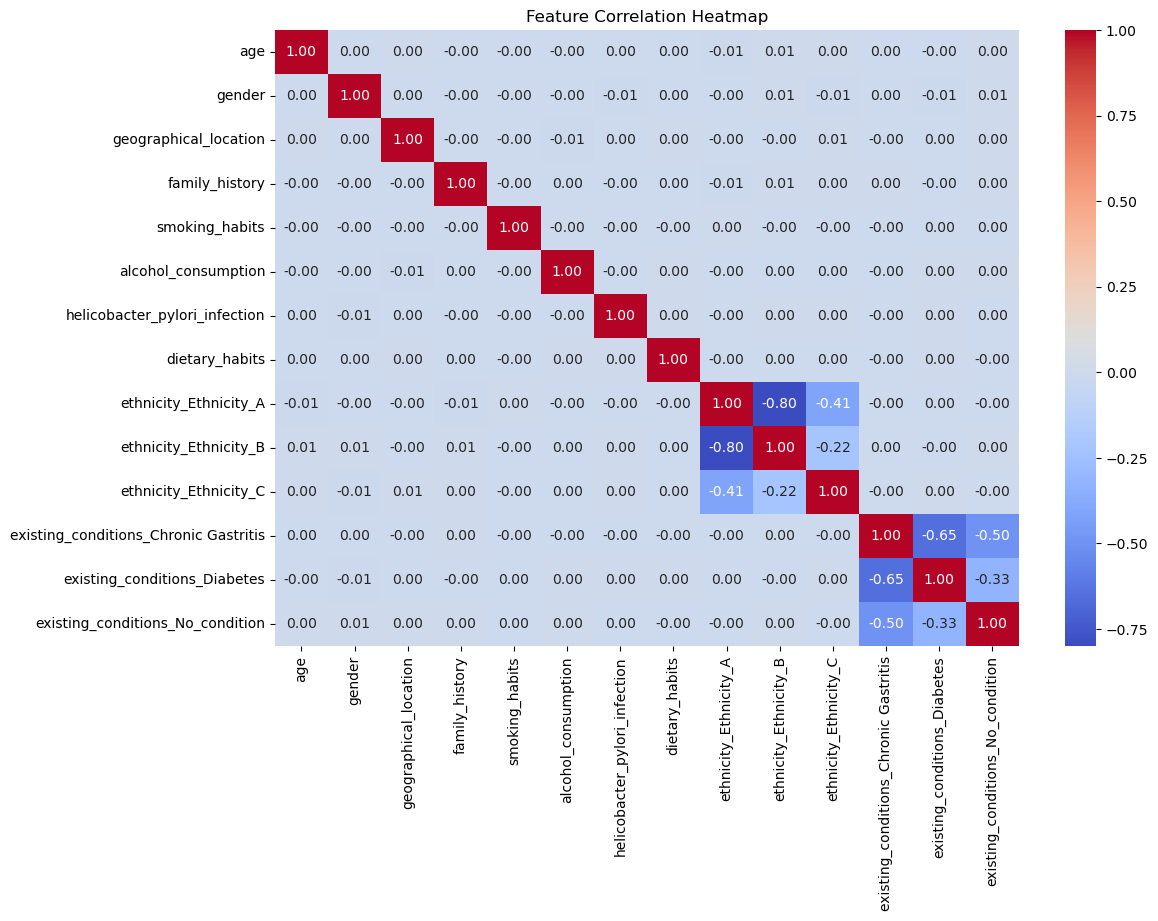

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(x_train.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

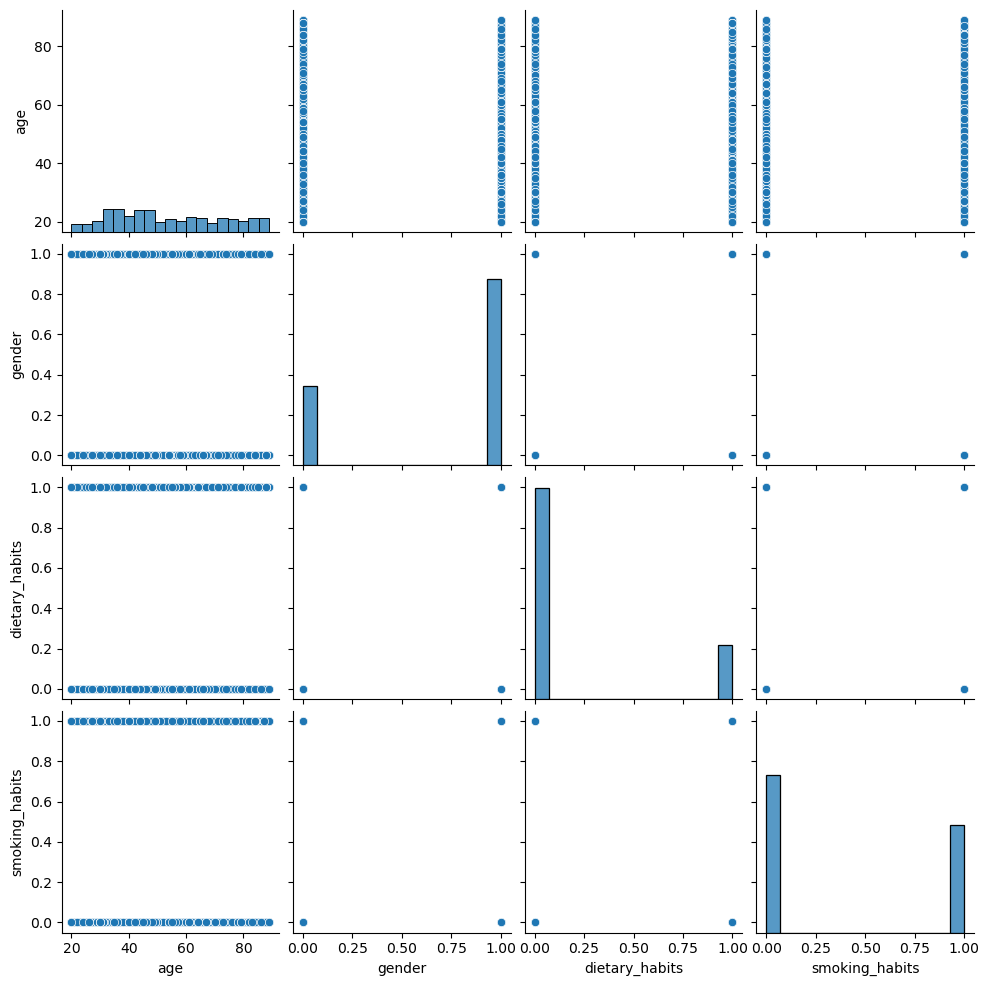

In [25]:
sample = x_train.sample(5000)

sns.pairplot(sample[['age', 'gender', 'dietary_habits', 'smoking_habits']])
plt.show()


In [26]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform only the 'age' column
x_train['age'] = scaler.fit_transform(x_train[['age']])


x_val['age'] = scaler.transform(x_val[['age']])

x_test['age'] = scaler.transform(x_test[['age']])

In [1]:
# joblib.dump(scaler, "../../models/Early screening/ES_minmaxscaler.pkl")

In [28]:
x_train.head()

,age,gender,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,ethnicity_Ethnicity_A,ethnicity_Ethnicity_B,ethnicity_Ethnicity_C,existing_conditions_Chronic Gastritis,existing_conditions_Diabetes,existing_conditions_No_condition
66078,0.3043,1,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0
69516,0.3333,1,0,1,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
122404,0.8986,0,0,0,1,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
51200,0.5942,1,1,0,0,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0
199948,0.7681,1,0,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0


In [29]:
x_train.describe()

,age,gender,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,ethnicity_Ethnicity_A,ethnicity_Ethnicity_B,ethnicity_Ethnicity_C,existing_conditions_Chronic Gastritis,existing_conditions_Diabetes,existing_conditions_No_condition
count,148647.0000,148647.0000,148647.0000,148647.0000,148647.0000,148647.0000,148647.0000,148647.0000,148647.0000,148647.0000,148647.0000,148647.0000,148647.0000,148647.0
mean,0.4822,0.7007,0.2014,0.3011,0.3986,0.4987,0.2501,0.2005,0.6005,0.2986,0.1009,0.5002,0.2999,0.2
std,0.2754,0.4580,0.4010,0.4587,0.4896,0.5000,0.4331,0.4004,0.4898,0.4577,0.3011,0.5000,0.4582,0.4
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
25%,0.2464,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
50%,0.4348,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0
75%,0.7246,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0


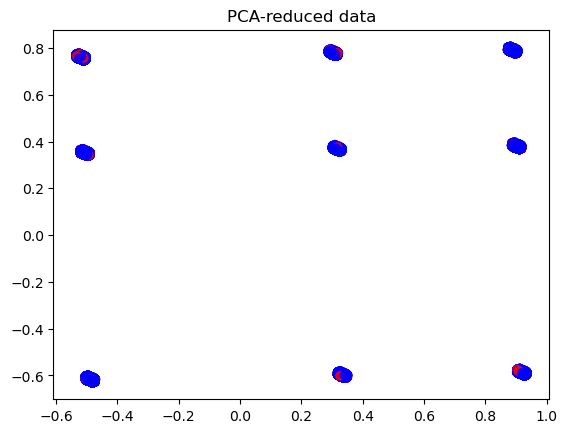

In [30]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='bwr', alpha = 0.8)
plt.title("PCA-reduced data")
plt.show()

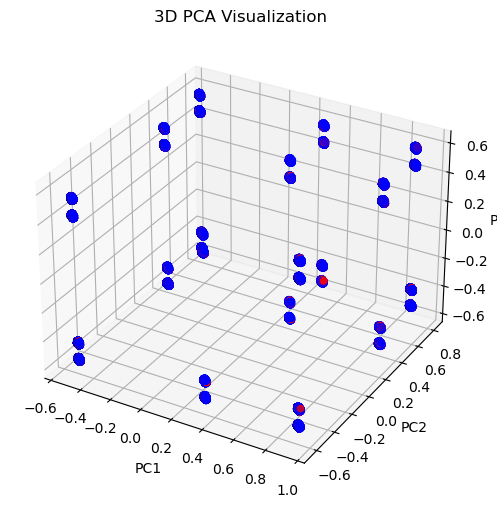

In [31]:
pca = PCA(n_components=3)
X_3d = pca.fit_transform(x_train)

# 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_train, cmap='bwr', alpha=0.7)
ax.set_title("3D PCA Visualization")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## data is now encoded and scaled

## Lets test the data before and after balancing

### Testing using DT

[[28024   685]
 [ 3066    78]]
Decesion Tree
Accuracy:  0.8822402913383355
Percission:  0.10222804718217562
Recall:  0.02480916030534351
F1:  0.0399283337599181


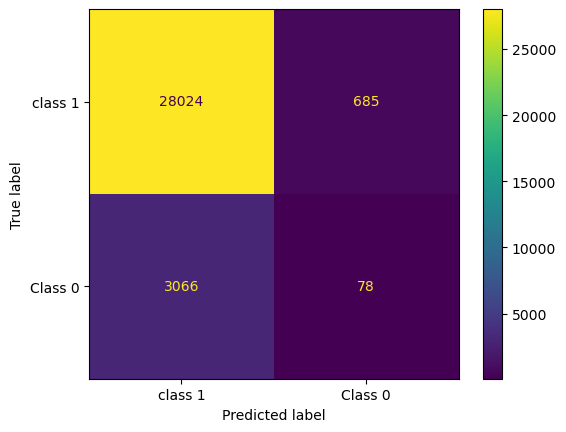

In [32]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred = DT.predict(x_val)


accuracy = accuracy_score(y_val, y_pred)
Percission = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)


cm = confusion_matrix(y_val, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
disp.plot()


print("Decesion Tree")
print("Accuracy: ", accuracy)
print("Percission: ", Percission)
print("Recall: ", recall)
print("F1: ", f1)

### The same model but with `class_weight='balanced'`

[[18532 10177]
 [ 2047  1097]]
Decesion Tree
Accuracy:  0.6162370891281825
Percission:  0.09730353024658506
Recall:  0.34891857506361323
F1:  0.15217089748924956


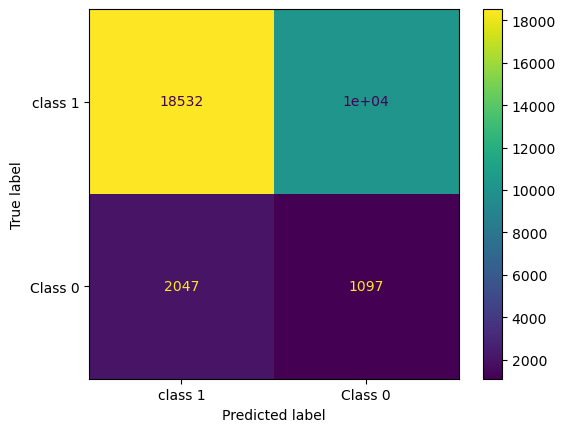

In [33]:
DT = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_val)


accuracy = accuracy_score(y_val, y_pred)
Percission = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)


cm = confusion_matrix(y_val, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
disp.plot()


print("Decesion Tree")
print("Accuracy: ", accuracy)
print("Percission: ", Percission)
print("Recall: ", recall)
print("F1: ", f1)

### Testing using RF

[[28078   631]
 [ 3077    67]]
Random Forest
Accuracy:  0.8835902426772988
Percission:  0.09598853868194843
Recall:  0.021310432569974554
F1:  0.034877667881311816


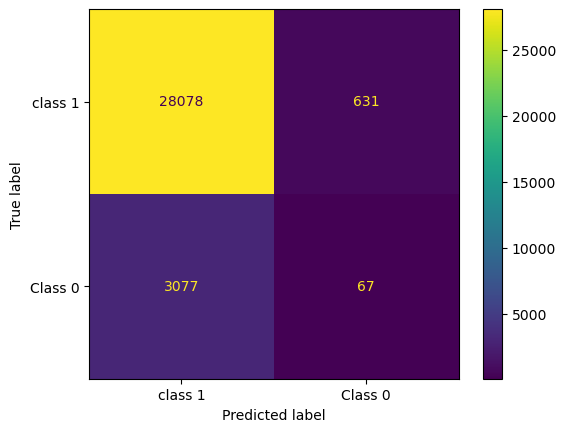

In [34]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_val)


accuracy = accuracy_score(y_val, y_pred)
Percission = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)


cm = confusion_matrix(y_val, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
disp.plot()


print("Random Forest")
print("Accuracy: ", accuracy)
print("Percission: ", Percission)
print("Recall: ", recall)
print("F1: ", f1)

# balancing

In [35]:
y_train.value_counts()

label
0    133976
1     14671
Name: count, dtype: int64

# Using SmoteNC

In [ ]:

smote_nc = SMOTENC(categorical_features=['gender', 'geographical_location', 'family_history', 'smoking_habits',
       'alcohol_consumption', 'helicobacter_pylori_infection',
       'dietary_habits', 'ethnicity_Ethnicity_A', 'ethnicity_Ethnicity_B',
       'ethnicity_Ethnicity_C', 'existing_conditions_Chronic Gastritis',
       'existing_conditions_Diabetes', 'existing_conditions_No_condition'], random_state=42)

X_resampled, y_resampled = smote_nc.fit_resample(x_train, y_train)

In [ ]:
x_val_resampled, y_val_resampled = smote_nc.fit_resample(x_val, y_val)

In [ ]:
y_val_resampled.value_counts()

In [ ]:
X_resampled.head()

In [ ]:
y_resampled.value_counts()

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_resampled)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_resampled, cmap='bwr', alpha = 0.8)
plt.title("PCA-reduced data")
plt.show()

In [ ]:
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X_resampled)

# 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_resampled, cmap='bwr', alpha=0.7)
ax.set_title("3D PCA Visualization")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [ ]:
DT1 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DT1.fit(X_resampled,y_resampled)
y_pred1 = DT1.predict(x_val)


accuracy = accuracy_score(y_val, y_pred1)
Percission = precision_score(y_val, y_pred1)
recall = recall_score(y_val, y_pred1)
f1 = f1_score(y_val, y_pred1)


cm = confusion_matrix(y_val, y_pred1)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
disp.plot()


print("Decesion Tree")
print("Accuracy: ", accuracy)
print("Percission: ", Percission)
print("Recall: ", recall)
print("F1: ", f1)

In [ ]:
x_val_df = pd.DataFrame(x_val) 

# Add true and predicted labels
x_val_df['true_label'] = y_val
x_val_df['predicted_label'] = y_pred1

# Find misclassified rows
misclassified_df = x_val_df[x_val_df['true_label'] != x_val_df['predicted_label']]
misclassified_df.drop(columns = 'predicted_label', inplace = True)
misclassified_df.head()

In [ ]:
Y_miss = misclassified_df['true_label']
X_miss = misclassified_df.drop('true_label',axis = 1)


x_miss_train, x_mis_val, y_miss_train, y_mis_val = train_test_split(X_miss,Y_miss, test_size = 0.5 ,random_state = 42, stratify = Y_miss)

In [ ]:
DT2 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DT2.fit(x_miss_train,y_miss_train)
y_pred2 = DT2.predict(x_mis_val)


accuracy = accuracy_score(y_mis_val, y_pred2)
Percission = precision_score(y_mis_val, y_pred2)
recall = recall_score(y_mis_val, y_pred2)
f1 = f1_score(y_mis_val, y_pred2)


cm = confusion_matrix(y_mis_val, y_pred2)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
disp.plot()


print("Decesion Tree")
print("Accuracy: ", accuracy)
print("Percission: ", Percission)
print("Recall: ", recall)
print("F1: ", f1)

In [ ]:
x_val_df = pd.DataFrame(x_mis_val) 

# Add true and predicted labels
x_val_df['true_label'] = y_mis_val
x_val_df['predicted_label'] = y_pred2

# Find misclassified rows
misclassified_df = x_val_df[x_val_df['true_label'] != x_val_df['predicted_label']]
misclassified_df.drop(columns = 'predicted_label', inplace = True)
misclassified_df.head()

In [ ]:
Y_miss2 = misclassified_df['true_label']
X_miss2 = misclassified_df.drop('true_label',axis = 1)


x_miss2_train, x_mis2_val, y_miss2_train, y_mis2_val = train_test_split(X_miss2,Y_miss2, test_size = 0.5 ,random_state = 42, stratify = Y_miss2)

In [ ]:
DT3 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DT3.fit(x_miss2_train,y_miss2_train)
y_pred3 = DT3.predict(x_mis2_val)


accuracy = accuracy_score(y_mis2_val, y_pred3)
Percission = precision_score(y_mis2_val, y_pred3)
recall = recall_score(y_mis2_val, y_pred3)
f1 = f1_score(y_mis2_val, y_pred3)


cm = confusion_matrix(y_mis2_val, y_pred3)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
disp.plot()


print("Decesion Tree")
print("Accuracy: ", accuracy)
print("Percission: ", Percission)
print("Recall: ", recall)
print("F1: ", f1)

In [ ]:
x_val_df = pd.DataFrame(x_mis2_val) 

# Add true and predicted labels
x_val_df['true_label'] = y_mis2_val
x_val_df['predicted_label'] = y_pred3

# Find misclassified rows
misclassified_df = x_val_df[x_val_df['true_label'] != x_val_df['predicted_label']]
misclassified_df.drop(columns = 'predicted_label', inplace = True)
misclassified_df.head()

In [ ]:
Y_miss3 = misclassified_df['true_label']
X_miss3 = misclassified_df.drop('true_label',axis = 1)


x_miss3_train, x_mis3_val, y_miss3_train, y_mis3_val = train_test_split(X_miss3,Y_miss3, test_size = 0.5 ,random_state = 42, stratify = Y_miss3)

In [ ]:
DT4 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DT4.fit(x_miss3_train,y_miss3_train)
y_pred4 = DT4.predict(x_mis3_val)


accuracy = accuracy_score(y_mis3_val, y_pred4)
Percission = precision_score(y_mis3_val, y_pred4)
recall = recall_score(y_mis3_val, y_pred4)
f1 = f1_score(y_mis3_val, y_pred4)


cm = confusion_matrix(y_mis3_val, y_pred4)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
disp.plot()


print("Decesion Tree")
print("Accuracy: ", accuracy)
print("Percission: ", Percission)
print("Recall: ", recall)
print("F1: ", f1)

In [ ]:
y_pred1 = DT1.predict(x_val)
y_pred2 = DT2.predict(x_val)
y_pred3 = DT3.predict(x_val)
y_pred4 = DT4.predict(x_val)
all_preds = np.vstack([y_pred1, y_pred2, y_pred3, y_pred4])

# Apply majority vote across rows
final_preds = mode(all_preds, axis=0).mode.flatten()

In [ ]:
final_preds

In [ ]:

accuracy = accuracy_score(y_val, final_preds)
Percission = precision_score(y_val, final_preds)
recall = recall_score(y_val, final_preds)
f1 = f1_score(y_val, final_preds)


cm = confusion_matrix(y_val, final_preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
disp.plot()


print("Decesion Tree")
print("Accuracy: ", accuracy)
print("Percission: ", Percission)
print("Recall: ", recall)
print("F1: ", f1)

In [ ]:
# model = AdaBoostClassifier(
#     estimator=DecisionTreeClassifier(max_depth=13),
#     n_estimators=60
# )
# model.fit(X_resampled, y_resampled)

In [ ]:
# y_preds = model.predict(x_val_resampled)

# accuracy = accuracy_score(y_val_resampled, y_preds)
# Percission = precision_score(y_val_resampled, y_preds)
# recall = recall_score(y_val_resampled, y_preds)
# f1 = f1_score(y_val_resampled, y_preds)


# cm = confusion_matrix(y_val_resampled, y_preds)
# print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
# disp.plot()


# print("Decesion Tree")
# print("Accuracy: ", accuracy)
# print("Percission: ", Percission)
# print("Recall: ", recall)
# print("F1: ", f1)

# Hyperparameter Tuning using grid search

In [ ]:
# # Define base estimator
# base_tree = DecisionTreeClassifier()

# # Define AdaBoost model (don't set max_depth here)
# model = AdaBoostClassifier(estimator=base_tree)

# # Define parameter grid
# param_grid = {
#     'estimator__max_depth': [5, 10, 13, 15, 20],
#     'n_estimators': [30, 50, 100]
# }

# # GridSearchCV
# grid = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
# grid.fit(X_resampled, y_resampled)

# # Best parameters and model
# print("Best parameters:", grid.best_params_)
# print("Best F1 score on training set:", grid.best_score_)

# best_model = grid.best_estimator_

In [ ]:
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=13),
    n_estimators=100
)
model.fit(X_resampled, y_resampled)

In [ ]:
y_preds = model.predict(x_val_resampled)

accuracy = accuracy_score(y_val_resampled, y_preds)
Percission = precision_score(y_val_resampled, y_preds)
recall = recall_score(y_val_resampled, y_preds)
f1 = f1_score(y_val_resampled, y_preds)


cm = confusion_matrix(y_val_resampled, y_preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "Class 0"])
disp.plot()


print("Decesion Tree")
print("Accuracy: ", accuracy)
print("Percission: ", Percission)
print("Recall: ", recall)
print("F1: ", f1)

In [ ]:
# # Save the model to a file
# joblib.dump(model, '../../models/Early screening/Early Risk Screening.pkl')

In [ ]:
# import pickle

# # Assuming model3 is already trained
# filename = '../../models/Early screening/Early Risk Screening_.sav'

# # Save the trained model using pickle
# with open(filename, 'wb') as file:
#     pickle.dump(model, file)

# print("Model saved successfully!")